In [ ]:
%cd ..

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import random

from AugmentedNet.chord_vocabulary import frompcset
from AugmentedNet.feature_representation import KEYS

In [5]:
REDUCED_KEYS = ["G-", "e-", "D-", "b-", "A-", "f", "E-", "c", "B-", "g", "F", "d", "C", "a", "G", "e", "D", "b", "A", "f#", "E", "c#", "B", "g#"]
# REDUCED_KEYS = ["F", "d", "C", "a", "G", "e"]
# REDUCED_KEYS = ["C", "G"]
cmaj = frompcset[(0, 4, 7)]
cmaj_duples = [(k, v["rn"], v["chord"]) for k, v in cmaj.items()]
cmaj_duples

[('B', 'N', ['C', 'E', 'G']),
 ('C', 'I', ['C', 'E', 'G']),
 ('C-', 'N', ['D--', 'F-', 'A--']),
 ('F', 'V', ['C', 'E', 'G']),
 ('G', 'IV', ['C', 'E', 'G']),
 ('b', 'N', ['C', 'E', 'G']),
 ('e', 'VI', ['C', 'E', 'G']),
 ('e#', 'V', ['B#', 'D##', 'F##']),
 ('f', 'V', ['C', 'E', 'G'])]

In [201]:
def format_pcset(pcset):
    return "".join(str(pcset)).replace("(", "").replace(")", "").replace(", ", " ")
    # return "".join(str(pcset)).replace("10", "T").replace("11", "E").replace("(", "").replace(")", "").replace(", ", "")
    # return "".join(str(pcset)).replace("(", "").replace(")", "").replace(", ", "")
plt.rcParams["figure.figsize"] = (10, 10)
G = nx.DiGraph()
pcset_list = [(0, 4, 7), (2, 7, 11)]
edge_labels = {}
key_nodes = []
for pcset in frompcset.keys():
    pcset_dict = frompcset[pcset]
    pcset_duples = [(k, v["rn"], v["chord"]) for k, v in pcset_dict.items()]
    for key, rn, chord in pcset_duples:
        if key not in ["C"]:
            continue
        spelling = tuple(chord)
        G.add_edge(key, rn)
        # G.add_edge(pcset, rn)
        # G.add_edge(key, rn)
        key_nodes = []
        edge_labels[(key, rn)] = format_pcset(pcset)

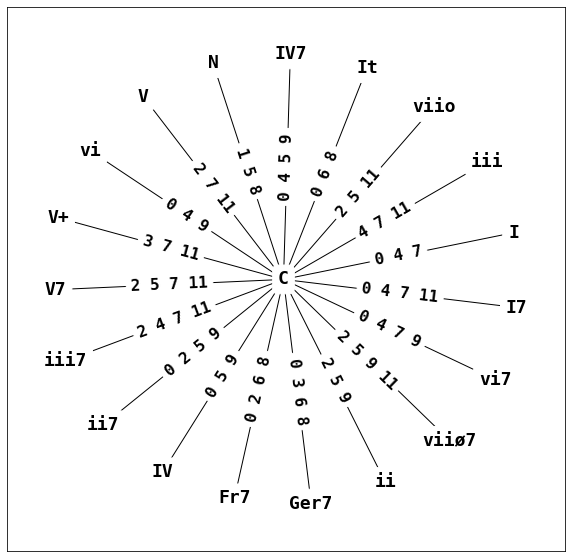

In [203]:
pos = nx.spring_layout(G, iterations=500)
nx.draw_networkx_nodes
nx.draw_networkx(G, pos=pos, with_labels=True, arrows=False, font_family="monospace", font_weight="bold", font_size=18, node_color="white", bbox=dict(facecolor="white", edgecolor='white', boxstyle='round,pad=0.3'))
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_family="monospace", font_color="black", font_size=16, font_weight="bold")
nx.write_graphml(G, "graph.graphml")
plt.savefig("pcset_key_to_rn.png")

In [204]:
plt.rcParams["figure.figsize"] = (9, 9)
G = nx.DiGraph()
pcset_list = [(0, 4, 7), (2, 7, 11)]
edge_labels = {}
node_labels = {}
for pcset in frompcset.keys():
    if pcset not in [(0, 4, 7)]:
        continue
    pcset_dict = frompcset[pcset]
    pcset_duples = [(k, v["rn"], v["chord"]) for k, v in pcset_dict.items()]
    for key, rn, chord in pcset_duples:
        spelling = tuple(chord)
        rnkey = f"{key.replace('-', 'b')}:{rn}"
        # G.add_edge(pcset, rnkey)
        G.add_edge(format_pcset(pcset), rnkey)
        # G.add_edge(key, f"{key}:{rn}")
        # G.add_edge(key, rn)
        # edge_labels[(pcset, rnkey)] = key.replace("-", "b")
        edge_labels[(format_pcset(pcset), rnkey)] = key.replace("-", "b")
        node_labels[rnkey] = key.replace("-", "b")

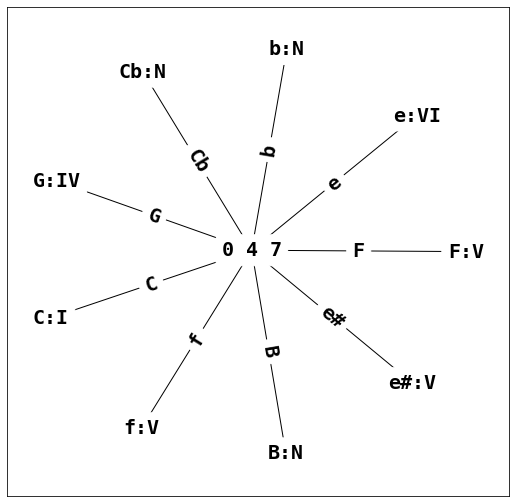

In [205]:
pos = nx.spring_layout(G, iterations=500)
# bbox=dict(facecolor="skyblue", edgecolor='black', boxstyle='round,pad=0.3')
nx.draw_networkx(G, pos=pos, arrows=False, with_labels=True, font_family="monospace", font_weight="bold", node_color="white", font_size=20, bbox=dict(facecolor="white", edgecolor='white', boxstyle='round,pad=0.3'))
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_family="monospace", font_color="black", font_size=20, font_weight="bold")
nx.write_graphml(G, "graph.graphml")
plt.savefig("pcset_pcset_to_rn.png")

In [206]:
plt.rcParams["figure.figsize"] = (9, 9)
G = nx.DiGraph()
pcset_list = [(0, 4, 7), (2, 7, 11)]
edge_labels = {}
for pcset in frompcset.keys():
    pcset_dict = frompcset[pcset]
    pcset_duples = [(k, v["rn"], v["chord"]) for k, v in pcset_dict.items()]
    for key, rn, chord in pcset_duples:
        if key not in REDUCED_KEYS:
            continue
        if rn not in ["I"]:
            continue
        key = key.replace("-", "b")
        G.add_edge(rn, key)
        # G.add_edge(key, pcset)
        edge_labels[(rn, key)] = format_pcset(pcset)

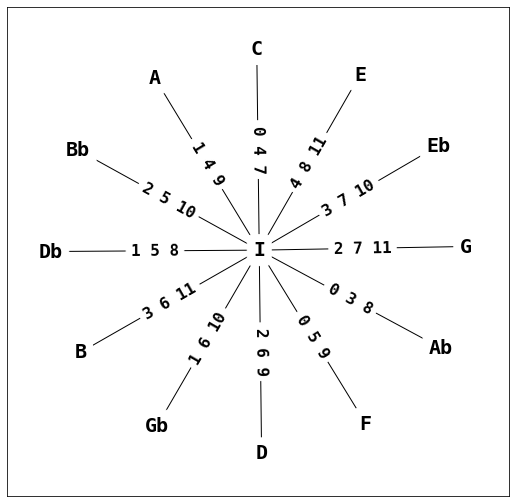

In [207]:
pos = nx.spring_layout(G, iterations=500)
nx.draw_networkx(G, pos=pos, arrows=False, with_labels=True, font_weight="bold", font_family="monospace", font_size=20, bbox=dict(facecolor="white", edgecolor='white', boxstyle='round,pad=0.3'))
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_family="monospace", font_color="black", font_size=16, font_weight="bold", bbox=dict(facecolor="white", edgecolor='white', boxstyle='round,pad=0.3'))
nx.write_graphml(G, "graph.graphml")
plt.savefig("pcset_rn_to_key.png")

In [566]:
def format_pcset(pcset):
    return (
        "".join(str(pcset))
        .replace("(", "")
        .replace(")", "")
        .replace(", ", " ")
    )
    # return "".join(str(pcset)).replace("10", "T").replace("11", "E").replace("(", "").replace(")", "").replace(", ", "")
    # return "".join(str(pcset)).replace("(", "").replace(")", "").replace(", ", "")


plt.rcParams["figure.figsize"] = (20, 9)
G = nx.DiGraph()
pcset_list = [(0, 4, 7), (2, 7, 11)]
edge_labels = {}
key_nodes = []
posi = {
    "C": (-7, 0),
    "a": (7, 0),
    "V": (0, 12),
    "V7": (0, 8),
    "viio": (0, 4),
    "N": (0, 0),
    "It": (0, -4),
    "Fr7": (0, -8),
    "Ger7": (0, -12),
    # "ii7": (-4, -10),
    # "iii": (-4, 10),
    # "iio": (4, 10),
    # "VI7": (4, -10),
}
counter = {"C": [-7, -6], "a": [7, -6]}
for pcset in frompcset.keys():
    pcset_dict = frompcset[pcset]
    pcset_duples = [(k, v["rn"], v["chord"]) for k, v in pcset_dict.items()]
    for key, rn, chord in pcset_duples:
        if key not in ["C", "a"]:
            continue
        if rn not in posi:
            if key in frompcset[pcset]:
                posi[rn] = tuple(counter[key])
                counter[key][0] *= 1
                counter[key][1] += 1
        spelling = tuple(chord)
        rnkey = f"{key.replace('-', 'b')}:{rn}"
        G.add_edge(key, rn)
        # G.add_edge(pcset, )
        # G.add_edge(key, rn)
        key_nodes = []
        edge_labels[(key, rn)] = format_pcset(pcset)

{'C': (-7, 0), 'a': (7, 0), 'V': (0, 12), 'V7': (0, 8), 'viio': (0, 4), 'N': (0, 0), 'It': (0, -4), 'Fr7': (0, -8), 'Ger7': (0, -12), 'ii7': (-7, -6), 'iv7': (7, -6), 'IV7': (-7, -5), 'VI7': (7, -5), 'I': (-7, -4), 'vi7': (-7, -3), 'i7': (7, -4), 'I7': (-7, -2), 'III+': (7, -3), 'III+7': (7, -2), 'vi': (-7, -1), 'i': (7, -1), 'IV': (-7, 0), 'VI': (7, 0), 'iii7': (-7, 1), 'viio7': (7, 1), 'ii': (-7, 2), 'iv': (7, 2), 'viiø7': (-7, 3), 'iiø7': (7, 3), 'iio': (7, 4), 'V+': (-7, 4), 'iii': (-7, 5)}


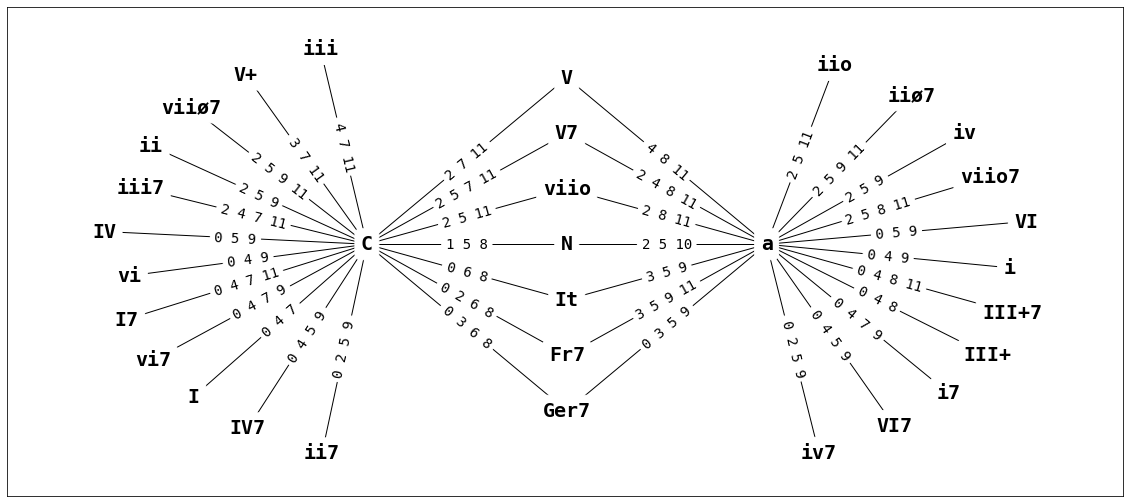

In [567]:
print(posi)
pos = nx.spring_layout(G, iterations=6, fixed=["C", "a", "V", "V7", "Ger7", "Fr7", "It", "N", "viio"], pos=posi)
nx.draw_networkx(G, pos=pos, arrows=False, with_labels=True, font_weight="bold", font_family="monospace", font_size=20, bbox=dict(facecolor="white", edgecolor='white', boxstyle='round,pad=0.3'))
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_family="monospace", font_color="black", font_size=14, bbox=dict(facecolor="white", edgecolor='white', boxstyle='round,pad=0.3'))
nx.write_graphml(G, "graph.graphml")
nx.drawing.nx_pydot.write_dot(G, "graph.dot")
plt.savefig("pcset_rn_to_key.png")

In [568]:
plt.rcParams["figure.figsize"] = (14, 14)
G = nx.DiGraph()
pcset_list = [(0, 4, 7), (2, 7, 11)]
edge_labels = {}
for pcset in frompcset.keys():
    pcset_dict = frompcset[pcset]
    pcset_duples = [(k, v["rn"], v["chord"]) for k, v in pcset_dict.items()]
    for key, rn, chord in pcset_duples:
        if key not in KEYS:
            continue
        if rn not in ["V"]:
            continue
        key = key.replace("-", "b")
        G.add_edge(rn, key)
        # G.add_edge(key, pcset)
        edge_labels[(rn, key)] = format_pcset(pcset)

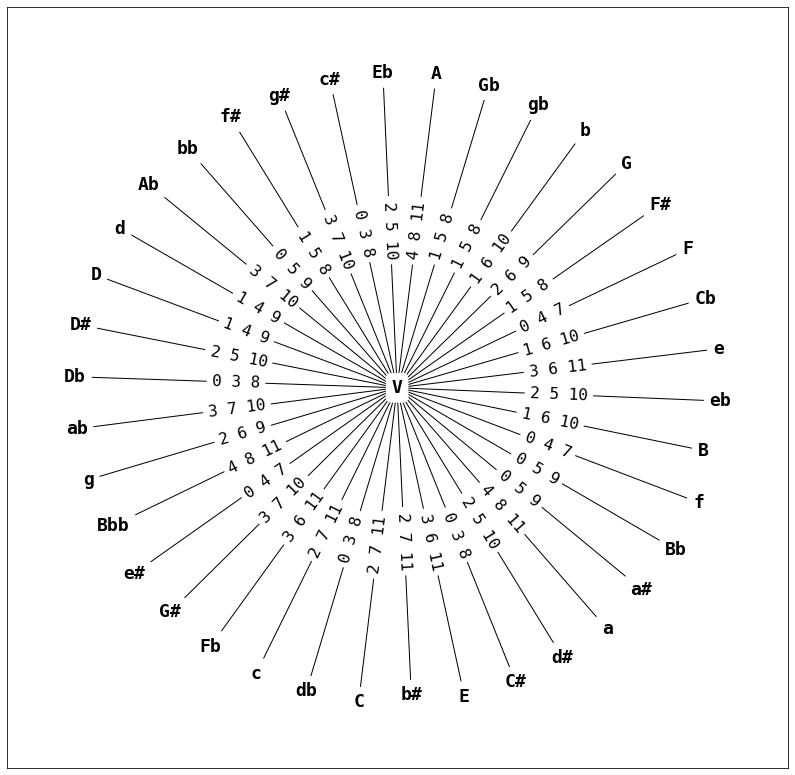

In [569]:
pos = nx.spring_layout(G, iterations=1000)
nx.draw_networkx(G, pos=pos, arrows=False, with_labels=True, font_weight="bold", font_family="monospace", font_size=18, bbox=dict(facecolor="white", edgecolor='white', boxstyle='round,pad=0.3'))
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_family="monospace", font_color="black", font_size=16, bbox=dict(facecolor="white", edgecolor='white', boxstyle='round,pad=0.3'))
nx.write_graphml(G, "graph.graphml")
nx.drawing.nx_pydot.write_dot(G, "graph.dot")
plt.savefig("pcset_rn_to_key.png")

In [570]:
def format_pcset(pcset):
    return (
        "".join(str(pcset))
        .replace("(", "")
        .replace(")", "")
        .replace(", ", " ")
    )
    # return "".join(str(pcset)).replace("10", "T").replace("11", "E").replace("(", "").replace(")", "").replace(", ", "")
    # return "".join(str(pcset)).replace("(", "").replace(")", "").replace(", ", "")

plt.rcParams["figure.figsize"] = (25, 15)
G = nx.Graph()
pcset_list = [(0, 4, 7), (2, 7, 11)]
edge_labels = {}
i = 200
for pcset in sorted(frompcset.keys()):
    pcset_dict = frompcset[pcset]
    pcset_duples = [(k, v["rn"], v["chord"]) for k, v in pcset_dict.items()]
    if pcset[0] == 0:
        for key, rn, chord in pcset_duples:
            # if key not in KEYS:
            #     continue
            # if rn not in ["V"]:
            #     continue
            # key = key.replace("-", "b")
            rnkey = f"{key.replace('-', 'b')}-{rn}"
            spelling = " ".join(chord)
            pcset = format_pcset(pcset)
            G.add_node(pcset, shape="ellipse", width=0.1, height=0.1)
            G.add_node(spelling, shape="plaintext", width=0.1, height=0.1)
            G.add_node(rnkey, shape="plaintext", label=rn, width=0.1, height=0.1)
            G.add_edge(pcset, spelling)
            G.add_edge(spelling, rnkey, label=key)
    i -= 1
    if not i:
        break

314


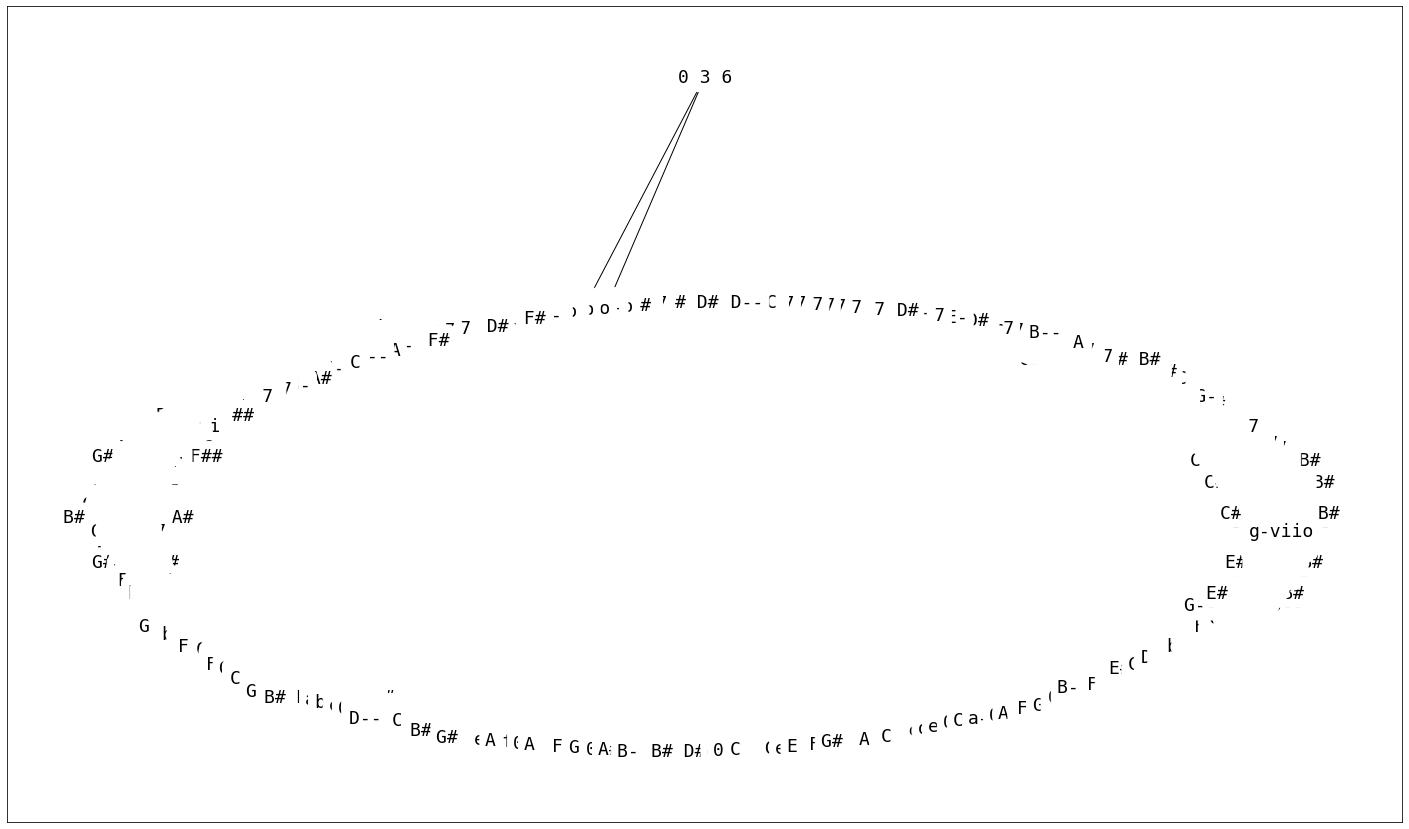

In [571]:
print(len(G.nodes()))
pos = nx.circular_layout(G, scale=.5)
pos["0 3 6"] = (0, 1)
nx.draw_networkx(G, pos=pos, arrows=False, with_labels=True, font_family="monospace", font_size=18, bbox=dict(facecolor="white", edgecolor='white', boxstyle='round,pad=0.3'))
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_family="monospace", font_color="black", font_size=16, bbox=dict(facecolor="white", edgecolor='white', boxstyle='round,pad=0.3'))
nx.write_graphml(G, "graph.graphml")
nx.drawing.nx_pydot.write_dot(G, "graph.dot")
plt.savefig("pcset_rn_to_key.png")

In [608]:
def format_pcset(pcset):
    return (
        "".join(str(pcset))
        .replace("(", "")
        .replace(")", "")
        .replace("10", "t")
        .replace("11", "e")
        .replace(", ", "")
    )
    # return "".join(str(pcset)).replace("10", "T").replace("11", "E").replace("(", "").replace(")", "").replace(", ", "")
    # return "".join(str(pcset)).replace("(", "").replace(")", "").replace(", ", "")

plt.rcParams["figure.figsize"] = (22, 15)
G = nx.Graph()
pcset_list = [(0, 4, 7), (2, 7, 11)]
edge_labels = {}
i = 200
for pcset in sorted(frompcset.keys()):
    pcset_dict = frompcset[pcset]
    pcset_duples = [(k, v["rn"], v["chord"]) for k, v in pcset_dict.items()]
    if pcset:
        for key, rn, chord in pcset_duples:
            # if key not in KEYS:
            #     continue
            # if rn not in ["V"]:
            #     continue
            # key = key.replace("-", "b")
            rnkey = f"{key.replace('-', 'b')}-{rn}"
            spelling = " ".join(chord)
            pcset = format_pcset(pcset)
            G.add_node(pcset, shape="ellipse", width=0.1, height=0.1)
            # G.add_node(spelling, shape="plaintext", width=0.1, height=0.1)
            # G.add_node(rnkey, shape="plaintext", label=rn, width=0.1, height=0.1)
            # G.add_edge(pcset, spelling)
            # G.add_edge(spelling, rnkey, label=key)
    i -= 1
    if not i:
        break

121


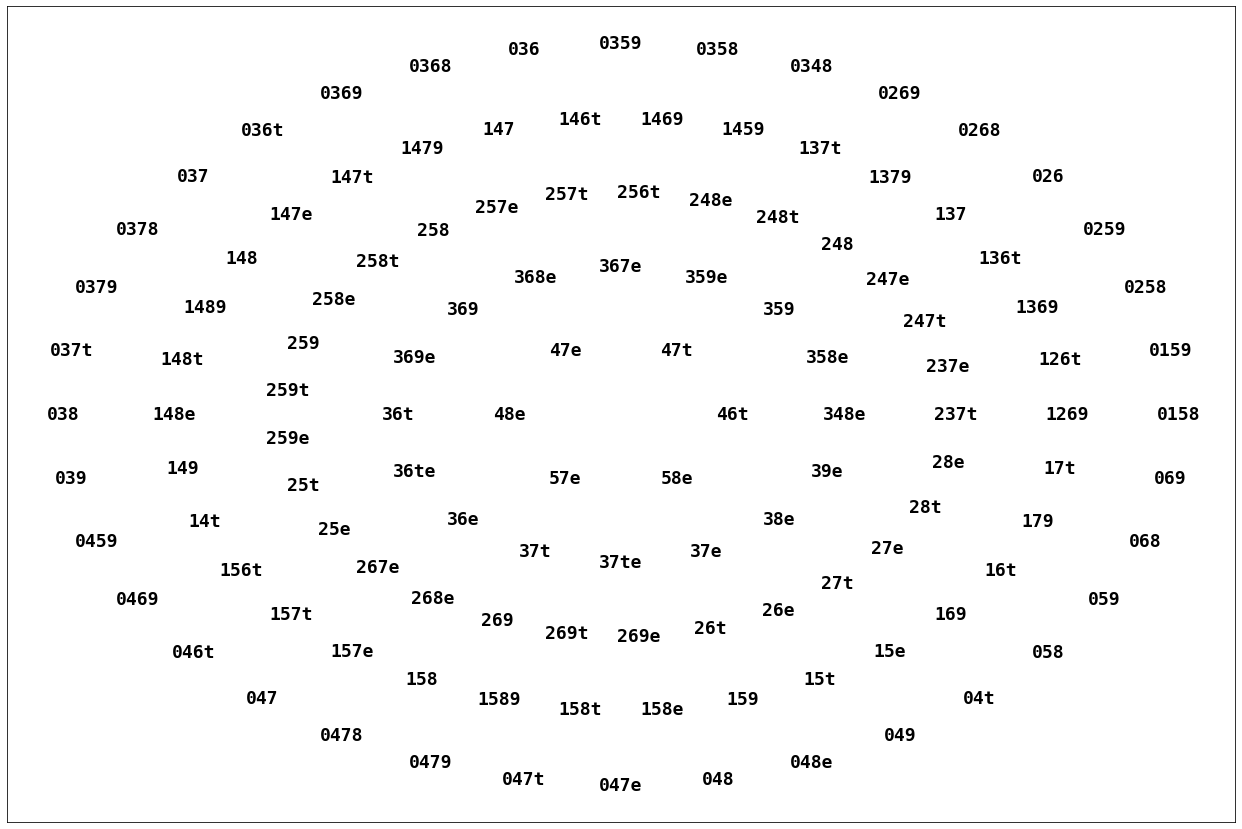

In [609]:
print(len(G.nodes()))
pos = nx.circular_layout([n for n in G.nodes() if n.startswith("0")], scale=1)
pos.update(nx.circular_layout([n for n in G.nodes() if n.startswith("1")], scale=.8))
pos.update(nx.circular_layout([n for n in G.nodes() if n.startswith("2")], scale=.6))
pos.update(nx.circular_layout([n for n in G.nodes() if n.startswith("3")], scale=.4))
pos.update(nx.circular_layout([n for n in G.nodes() if n[0] not in ["0", "1", "2", "3"]], scale=.2))
nx.draw_networkx(G, pos=pos, arrows=False, with_labels=True, font_weight="bold", font_family="monospace", font_size=18, bbox=dict(facecolor="white", edgecolor='white', boxstyle='round,pad=0.3'))
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_family="monospace", font_color="black", font_size=16, bbox=dict(facecolor="white", edgecolor='white', boxstyle='round,pad=0.3'))
nx.write_graphml(G, "graph.graphml")
nx.drawing.nx_pydot.write_dot(G, "graph.dot")
plt.savefig("pcset_rn_to_key.png")